<a href="https://colab.research.google.com/github/Luis98ros/Regression-Pricing/blob/main/Regressions_House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from scipy.stats import kurtosis, skew

In [ ]:
def categorias_utiles_pareto(df_column, porcentaje):
    # Data Frame con datos necesarios.
    frecuencia = df_column.value_counts()
    sum_acumulada = (df_column.value_counts()/len(df)*100).cumsum()
    pareto_df = pd.DataFrame({'Frecuencia':frecuencia,
                              'Porcentje_acumulado':sum_acumulada,
                              'Limite': porcentaje})

    # Obtención de categorías utiles.
    pareto_df['Categorías importantes'] = np.where(
    (pareto_df['Limite'] <= pareto_df['Porcentje_acumulado']) &             \
    (pareto_df['Limite'].shift(1) <= pareto_df['Porcentje_acumulado'].shift(1)),
      0, 100)
    categorias_utiles = pareto_df[pareto_df['Categorías importantes']==100].index.to_list()

   # Imprimir información util.
    print(f'Categorias: {pareto_df.shape[0]}')
    print(f'Categorias que hacen el {porcentaje}%: {len(categorias_utiles)}')
    print(f'Categorias importantes = {categorias_utiles}')


    # Gráfica de Pareto
    fig, axes = plt.subplots()
    ax1 = pareto_df.plot(use_index=True, y='Frecuencia',  kind='bar',
                         ax=axes, legend=False)
    ax2 = pareto_df.plot(use_index=True, y='Porcentje_acumulado', kind='line',
                         marker='D', ms=1, color="C1", ax=axes,
                         secondary_y=True, legend=False).legend(loc='lower right')
    axes.right_ax.set_ylim(0,105)
    ax3 = pareto_df.plot(use_index=True, y='Limite', color="gray", kind='line',
                         linestyle='dashed', ax=axes, secondary_y=True, legend=False).legend(loc='lower right')
    ax4 = pareto_df.plot(use_index=True, y='Categorías importantes',
                         color="yellow", kind='area', ax=axes,
                         secondary_y=True, alpha=0.1, legend=False).legend(loc='lower right')
    plt.title(f'{df_column.name}')

    return categorias_utiles

In [ ]:
def correlacion(dataframe, grafica=True, matrix=True, tamaño =(6, 4)):
    '''Devuelve la matriz de correlación de un dataframe
    y sí grafica=True, muestra un mapa de calor de la matriz de correlación'''
    corr=dataframe.corr()
    if grafica==True:
      fig = plt.figure(figsize = tamaño)
      ax = sns.heatmap(corr,
                       vmin = -1,
                       vmax = 1,
                       center = 0,
                       cmap = "coolwarm",
                       annot = True,
                       fmt=".2f",
                       square = True)
      ax.set_xticklabels(ax.get_xticklabels(),
                         rotation = 45,
                         horizontalalignment ='right')
    if matrix==True:
      return corr

In [ ]:
def describe_datos(df):
  unicos =[]
  for col in df:
    unicos.append(df[col].unique())
  unicos = pd.Series(unicos, index=df.columns)
  descripcion = pd.concat([df.dtypes, df.isna().sum(),df.nunique(),unicos], axis=1)
  descripcion.columns = ['dtypes', 'null','nunique','unique' ]
  return(descripcion)

In [ ]:
## Exportamos la data
df = pd.read_csv('/content/drive/MyDrive/ML Datos/Examen Modulo 2/Datos Examen 2 .csv')
print(df.shape)
df.head(10)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#### Aqui observamos que tenemos diversos valores nulos y tenemos diversos tipos de datos

describe_datos(df)

,dtypes,null,nunique,unique
Id,int64,0,1460,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
MSSubClass,int64,0,15,"[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80,..."
MSZoning,object,0,5,"[RL, RM, C (all), FV, RH]"
LotFrontage,float64,259,110,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan..."
LotArea,int64,0,1073,"[8450, 9600, 11250, 9550, 14260, 14115, 10084,..."
...,...,...,...,...
MoSold,int64,0,12,"[2, 5, 9, 12, 10, 8, 11, 4, 1, 7, 3, 6]"
YrSold,int64,0,5,"[2008, 2007, 2006, 2009, 2010]"
SaleType,object,0,9,"[WD, New, COD, ConLD, ConLI, CWD, ConLw, Con, ..."
SaleCondition,object,0,6,"[Normal, Abnorml, Partial, AdjLand, Alloca, Fa..."


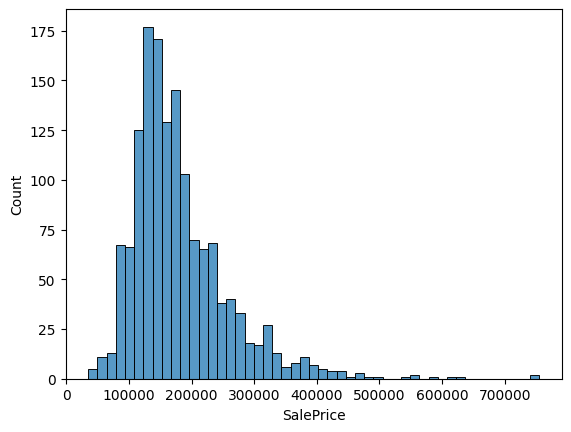

In [ ]:
## Se observa que la distribucion de la variable precio tiene muchos valores extremos en la derecha de la grafica
sns.histplot(df['SalePrice'])
plt.show()

Comenazamos tratando los numeros nulos.
En primera estancia decidi eliminar solo la columna de ID, debido a que me gustaria hacer un analisis de los demas features y poder depurar si es necesario


In [ ]:
col_elimi = "Id"
df = df.drop(columns = col_elimi)

Valores Nulos

In [ ]:
df.isna().sum()/len(df)*100

,0
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,17.739726
LotArea,0.000000
Street,0.000000
...,...
MoSold,0.000000
YrSold,0.000000
SaleType,0.000000
SaleCondition,0.000000


Las siguientes columnas contienen valores NA, sin embargo como tal no es un valor faltante mas bien es que no cuentan con esa caracteristica, por eso pasara de ser un valor NA a una caracteristica "None", es decir no tiene una piscina etc.

In [ ]:
Na_as_None = ["Alley","MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]


Sin embargo, al revisar las columnas mas detenidamente observe que hay algunas peculiaridades con algunos valores, es decir, hay valores que efectivamente son nulos, por ejemplo tenemos un registro que en base a otras columnas sabes que si tiene un basement sin embargo hay un registro nulo, primero trataremos estos casos

In [ ]:
df[["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","BsmtFinSF1","BsmtFinSF2"]].loc[948]

,948
BsmtQual,Gd
BsmtCond,TA
BsmtExposure,NaN
BsmtFinType1,Unf
BsmtFinType2,Unf
BsmtFinSF1,0
BsmtFinSF2,0


In [ ]:
df_fix_bsmtexposure = df[(df["BsmtQual"] == 'Gd') & (df["BsmtCond"] == 'TA') & (df["BsmtFinType1"] == 'Unf') & (df["BsmtFinType2"] == 'Unf')]
df_fix_bsmtexposure.BsmtExposure.value_counts()

,count
BsmtExposure,
No,136
Av,26
Mn,10
Gd,5


In [ ]:
df[["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]].loc[332]

,332
BsmtQual,Gd
BsmtCond,TA
BsmtExposure,No
BsmtFinType1,GLQ
BsmtFinType2,NaN


In [ ]:
df_fix_BsmtFinType2 = df[(df["BsmtQual"] == 'Gd') & (df["BsmtCond"] == 'TA') & (df["BsmtFinType1"] == 'GLQ') & (df["BsmtExposure"] == 'No')]
df_fix_BsmtFinType2.BsmtFinType2.value_counts()

,count
BsmtFinType2,
Unf,126
LwQ,1
Rec,1


In [ ]:
df.Electrical.value_counts()

,count
Electrical,
SBrkr,1334
FuseA,94
FuseF,27
FuseP,3
Mix,1


In [ ]:
###Aqui imputamos los datos en base a la distribucion de los valores con ciertas caracteristicas
df.iloc[948,31] = "No"
df.iloc[332,34] = "Unf"
df["Electrical"].fillna("SBrkr",inplace = True)
df["MasVnrArea"].fillna(0,inplace = True)

<ipython-input-145-8bac53ebb766>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Electrical"].fillna("SBrkr",inplace = True)
<ipython-input-145-8bac53ebb766>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [ ]:
### Creamos las nuevas categoricas, en lugar de NA aparecera una leyenda haciendo referencia a que no cuenta con esa caracteristica
for x in Na_as_None:
  df[x].fillna("None_"+x,inplace = True)

<ipython-input-146-efd27e507e1f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[x].fillna("None_"+x,inplace = True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
df.BsmtExposure.value_counts()

,count
BsmtExposure,
No,954
Av,221
Gd,134
Mn,114
None_BsmtExposure,37


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='nulos', ylabel='SalePrice'>

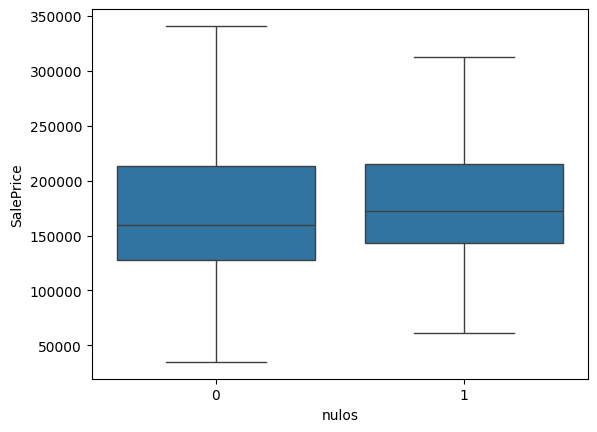

In [ ]:
df['nulos'] = np.where(df['LotFrontage'].isna(),1,0)

sns.boxplot(x = 'nulos' , y = 'SalePrice', data = df,showfliers=False)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,nulos
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,-0.015323
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.192411,0.233633,0.049900,...,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799,NaN
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,0.121964
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982,-0.035953
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856,0.025767
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897,0.049031
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101,-0.033815
MasVnrArea,0.023573,0.192411,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614,0.011042
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420,0.078290
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378,0.047717


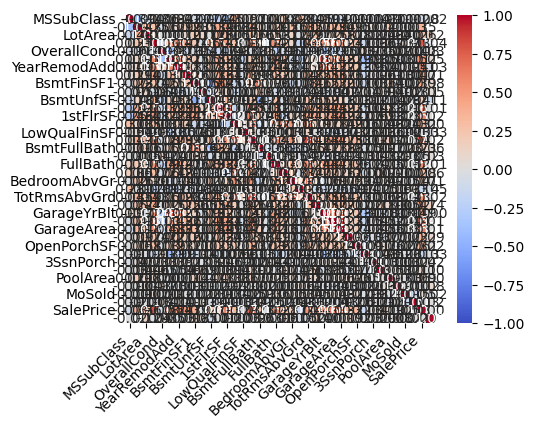

In [ ]:
col_numericas = list(df.select_dtypes(include=['int64', 'float64', 'bool']).columns)
correlacion(df[col_numericas])

<Axes: xlabel='nulos', ylabel='MSZoning'>

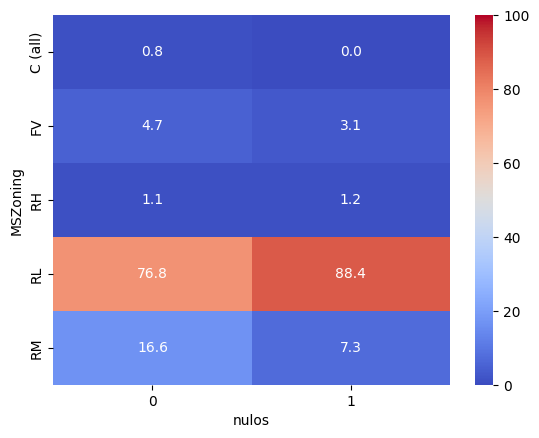

In [ ]:
tabla = (pd.crosstab(df['MSZoning'],df['nulos'], normalize = 'columns')*100)

sns.heatmap(tabla,  vmin = 0, vmax = 100, cmap = "coolwarm", annot = True,
            fmt=".1f")

In [ ]:
###Para la variable LotFrontage imputamos la data conforme a la moda
dict_LotFrontage = df.groupby('MSZoning')['LotFrontage'].agg(pd.Series.mode).to_dict()
dict_LotFrontage

{'C (all)': 60.0, 'FV': 75.0, 'RH': 60.0, 'RL': 60.0, 'RM': 60.0}

In [ ]:
df['LotFrontage'] = df['LotFrontage'].fillna( df['MSZoning'].map(dict_LotFrontage))
df['LotFrontage'].isna().sum()

0

In [ ]:
df = df.drop('nulos', axis=1)

In [ ]:
### En la tabla de correlaciones podemos observar que la variable GarageYrbuilt esta muy correlacionada con la columna YearBuilt, al tener la columna GarageYrBlt valores nulos decidi borrarla
df = df.drop(columns = "GarageYrBlt")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
## cambiamos variables que son realmente categoricas a type object
df[["MSSubClass","MoSold"]] = df[["MSSubClass","MoSold"]].astype('object')

In [ ]:
### Comenzamos el one hot enconding
categoricas = list(df.select_dtypes(include='object').columns)
categoricas

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'SaleType',
 'SaleCondition']

In [ ]:
df[categoricas].nunique()

,0
MSSubClass,15
MSZoning,5
Street,2
Alley,3
LotShape,4
LandContour,4
Utilities,2
LotConfig,5
LandSlope,3
Neighborhood,25


Categorias: 15
Categorias que hacen el 99%: 13
Categorias importantes = [20, 60, 50, 120, 30, 160, 70, 80, 90, 190, 85, 75, 45]


[20, 60, 50, 120, 30, 160, 70, 80, 90, 190, 85, 75, 45]

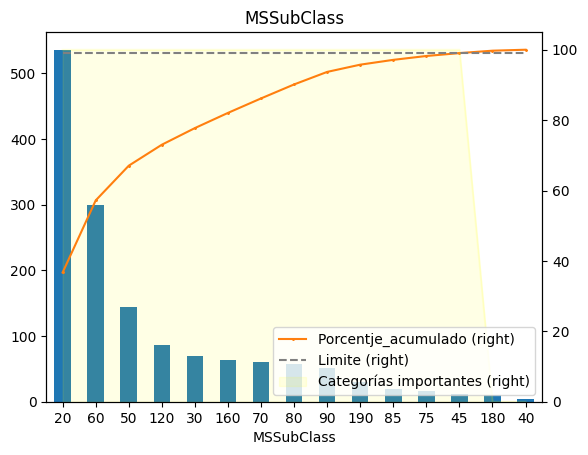

In [ ]:
categorias_utiles_pareto(df["MSSubClass"], 99)

Categorias: 15
Categorias que hacen el 99%: 13
Categorias importantes = [20, 60, 50, 120, 30, 160, 70, 80, 90, 190, 85, 75, 45]
Categorias: 5
Categorias que hacen el 99%: 4
Categorias importantes = ['RL', 'RM', 'FV', 'RH']
Categorias: 2
Categorias que hacen el 99%: 1
Categorias importantes = ['Pave']
Categorias: 3
Categorias que hacen el 99%: 3
Categorias importantes = ['None_Alley', 'Grvl', 'Pave']
Categorias: 4
Categorias que hacen el 99%: 3
Categorias importantes = ['Reg', 'IR1', 'IR2']
Categorias: 4
Categorias que hacen el 99%: 4
Categorias importantes = ['Lvl', 'Bnk', 'HLS', 'Low']
Categorias: 2
Categorias que hacen el 99%: 1
Categorias importantes = ['AllPub']
Categorias: 5
Categorias que hacen el 99%: 4
Categorias importantes = ['Inside', 'Corner', 'CulDSac', 'FR2']
Categorias: 3
Categorias que hacen el 99%: 2
Categorias importantes = ['Gtl', 'Mod']
Categorias: 25
Categorias que hacen el 99%: 23
Categorias importantes = ['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst', 'Gilb

<ipython-input-129-40aa62556ca0>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots()


Categorias: 6
Categorias que hacen el 99%: 4
Categorias importantes = ['PConc', 'CBlock', 'BrkTil', 'Slab']
Categorias: 5
Categorias que hacen el 99%: 5
Categorias importantes = ['TA', 'Gd', 'Ex', 'None_BsmtQual', 'Fa']
Categorias: 5
Categorias que hacen el 99%: 4
Categorias importantes = ['TA', 'Gd', 'Fa', 'None_BsmtCond']
Categorias: 5
Categorias que hacen el 99%: 5
Categorias importantes = ['No', 'Av', 'Gd', 'Mn', 'None_BsmtExposure']
Categorias: 7
Categorias que hacen el 99%: 7
Categorias importantes = ['Unf', 'GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'None_BsmtFinType1']
Categorias: 7
Categorias que hacen el 99%: 6
Categorias importantes = ['Unf', 'Rec', 'LwQ', 'None_BsmtFinType2', 'BLQ', 'ALQ']
Categorias: 6
Categorias que hacen el 99%: 2
Categorias importantes = ['GasA', 'GasW']
Categorias: 5
Categorias que hacen el 99%: 4
Categorias importantes = ['Ex', 'TA', 'Gd', 'Fa']
Categorias: 2
Categorias que hacen el 99%: 2
Categorias importantes = ['Y', 'N']
Categorias: 5
Categorias que hacen

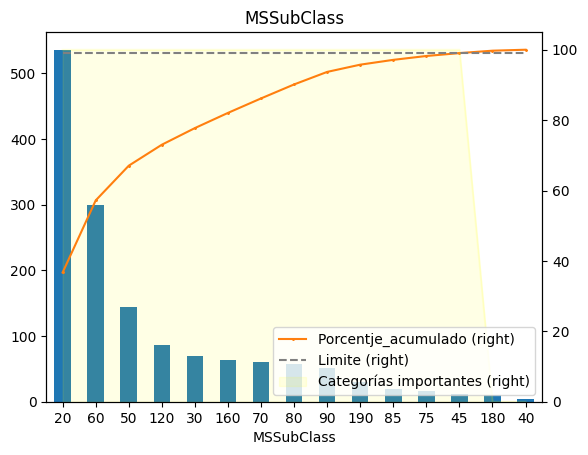

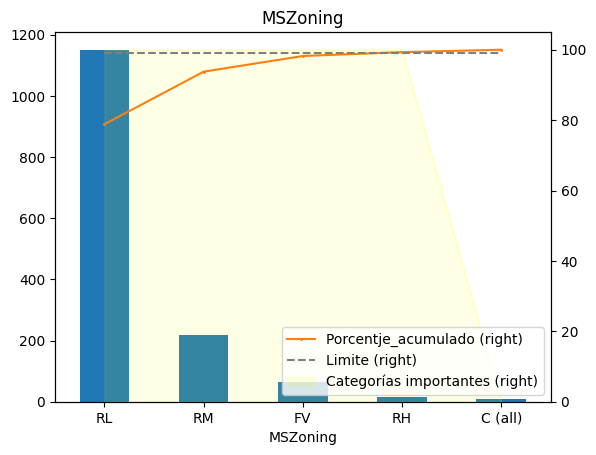

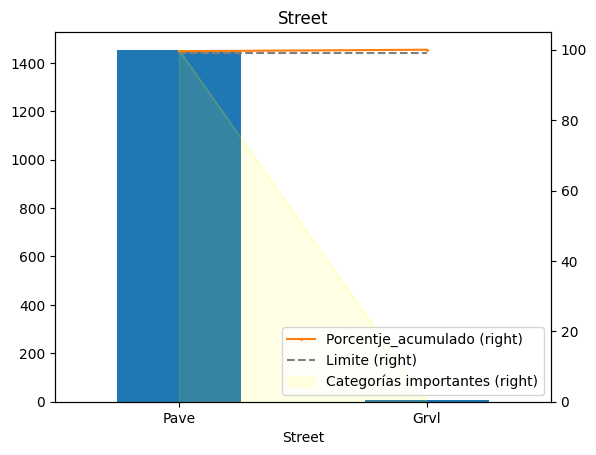

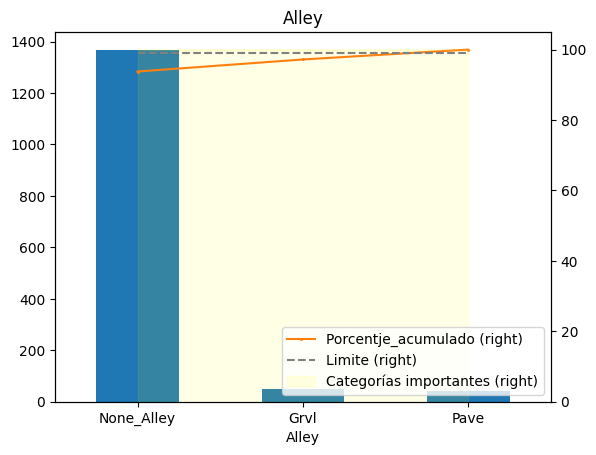

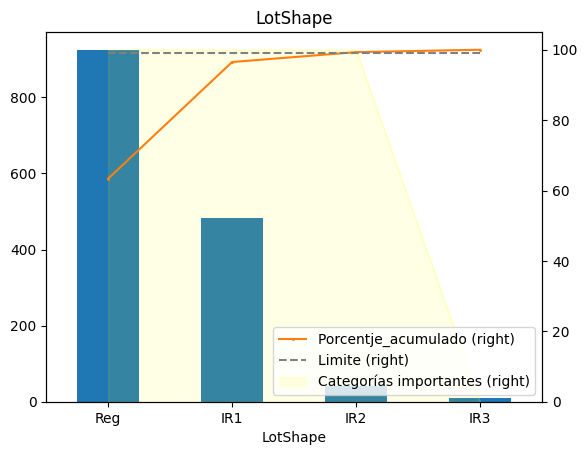

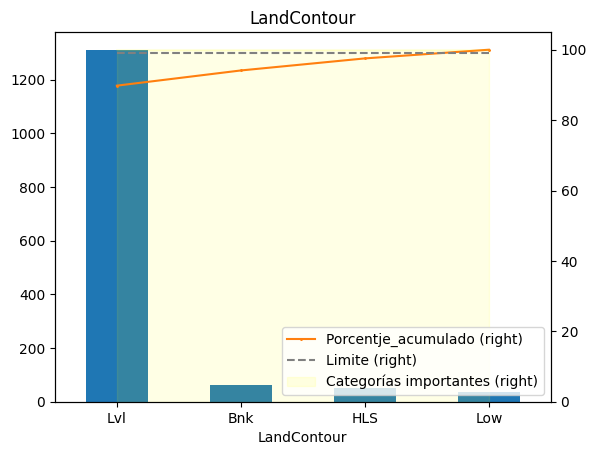

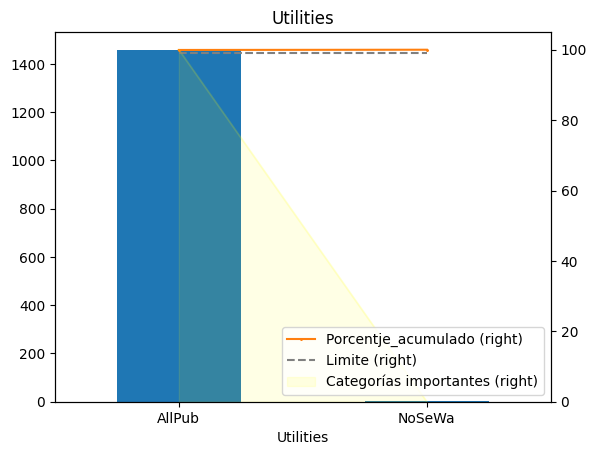

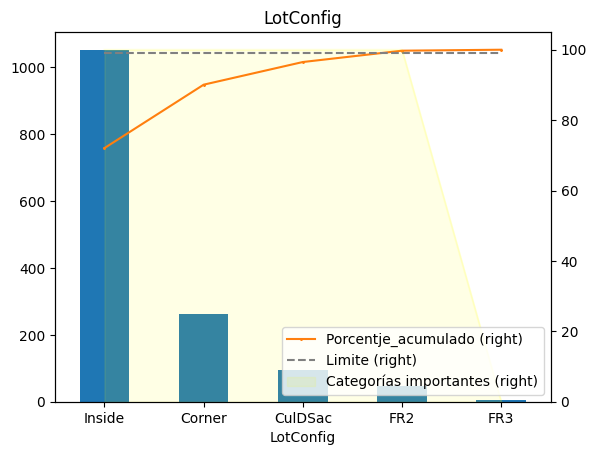

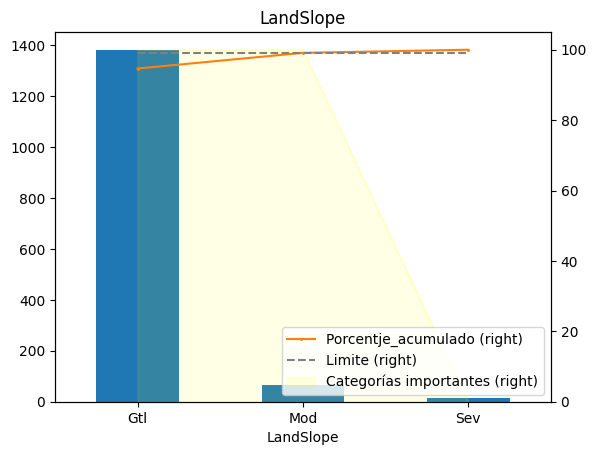

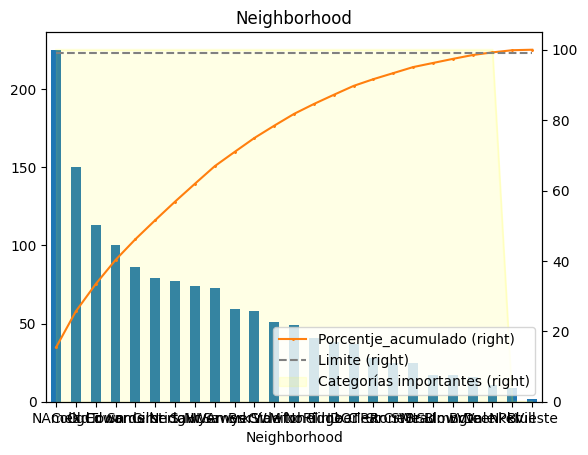

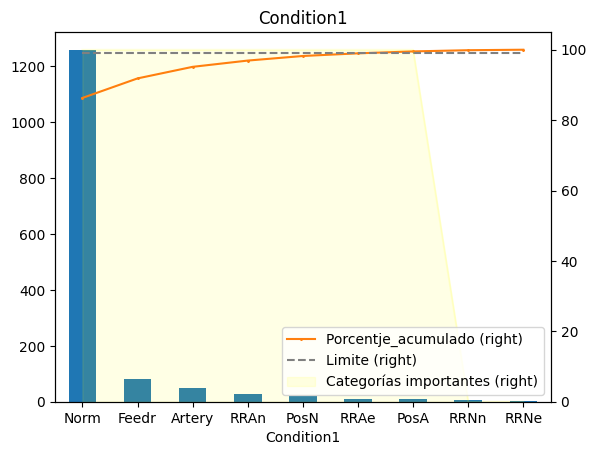

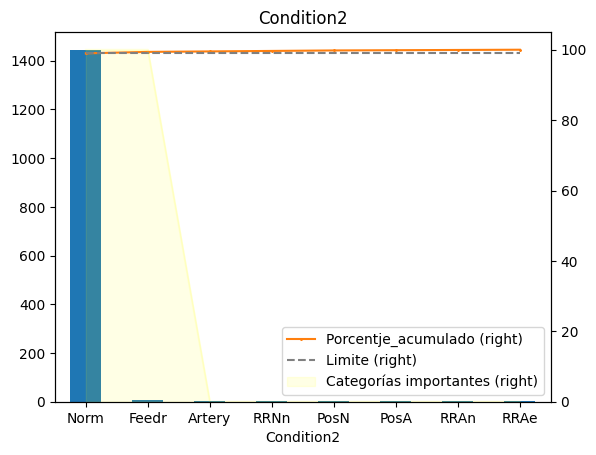

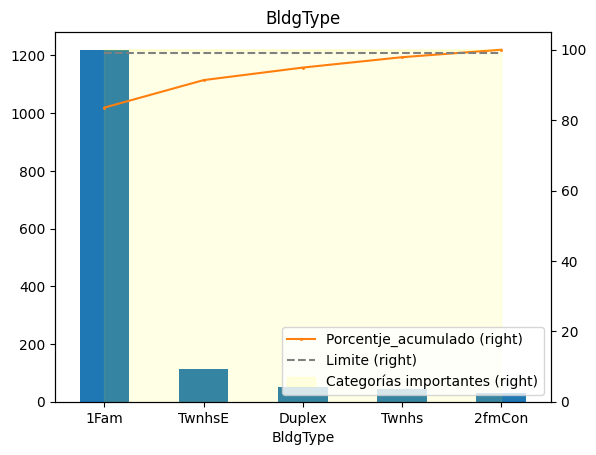

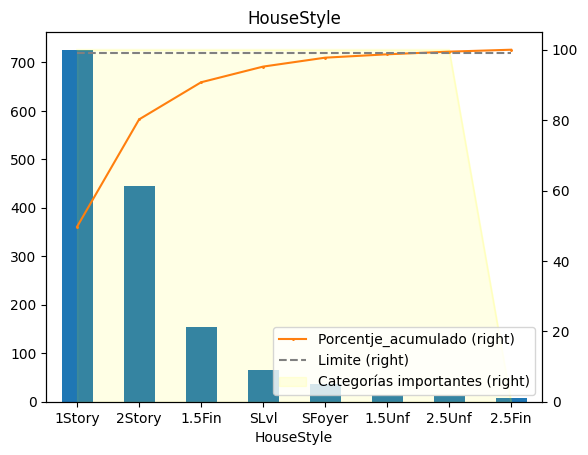

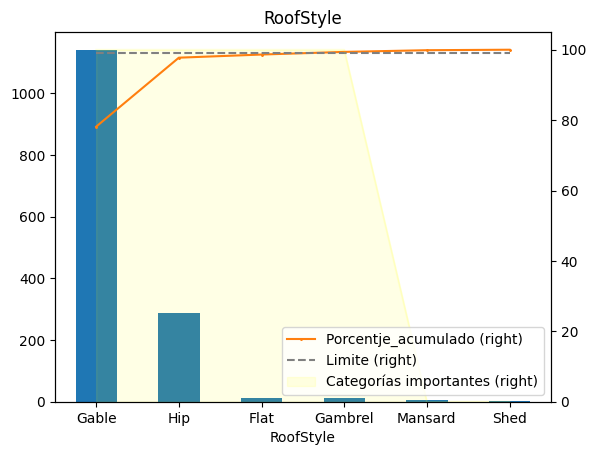

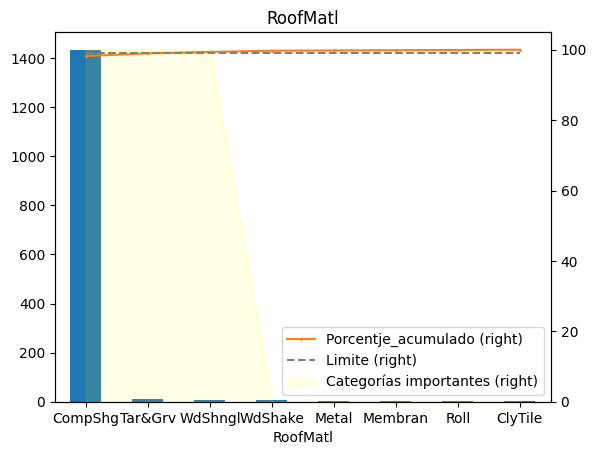

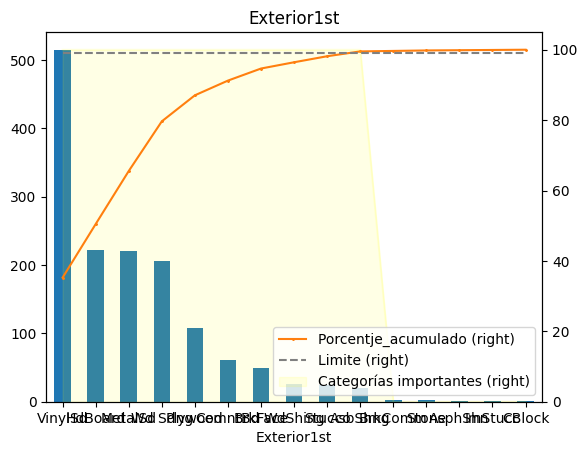

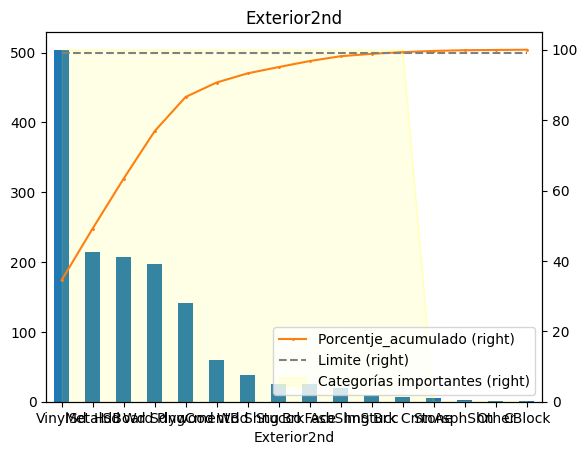

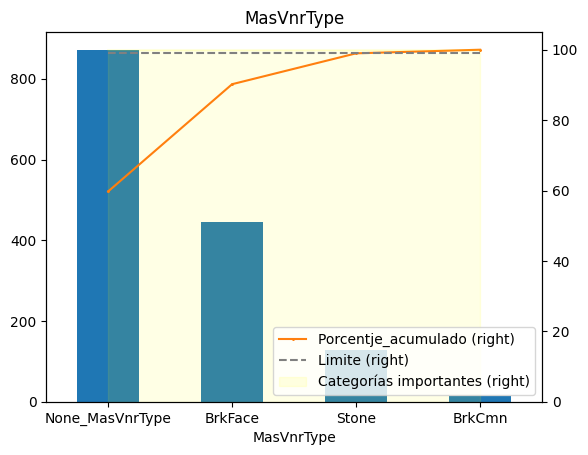

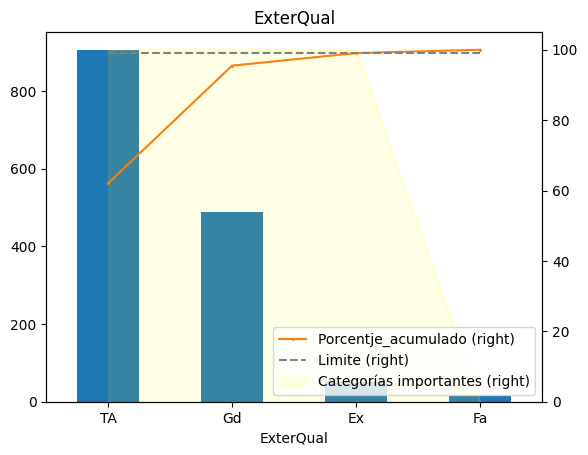

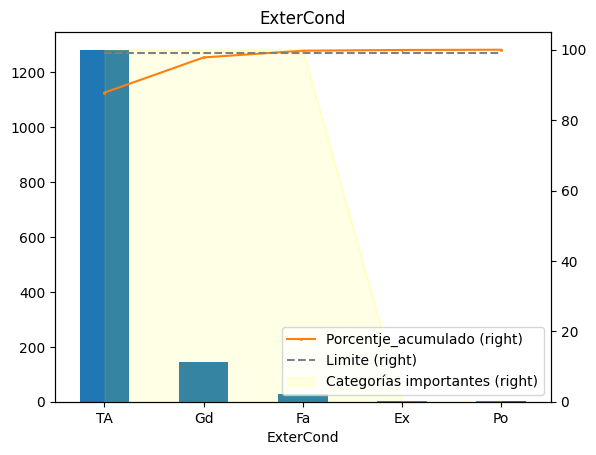

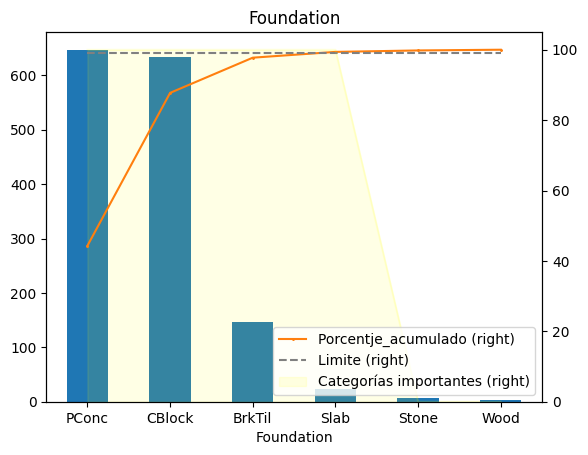

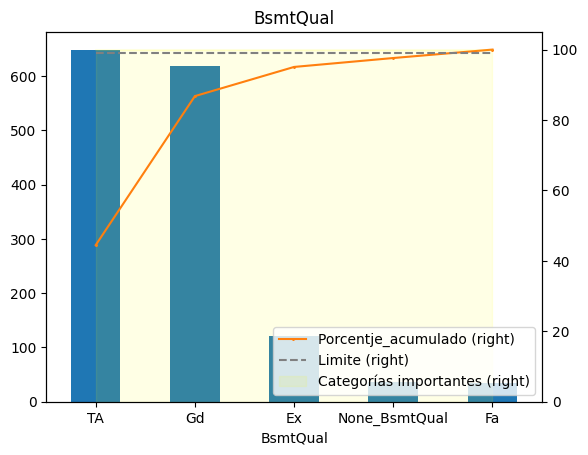

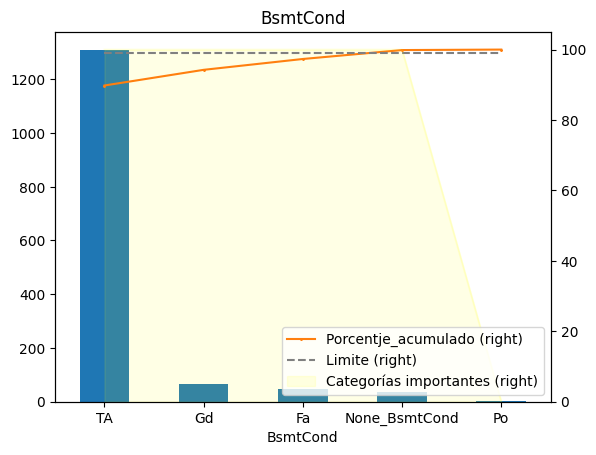

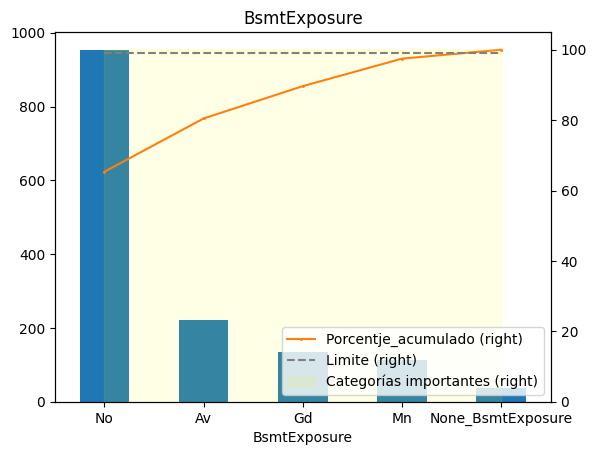

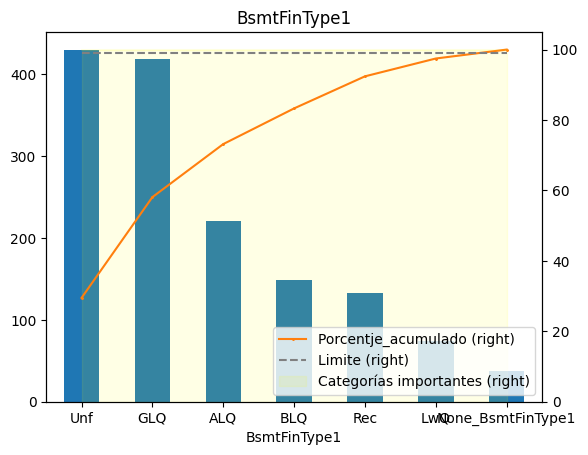

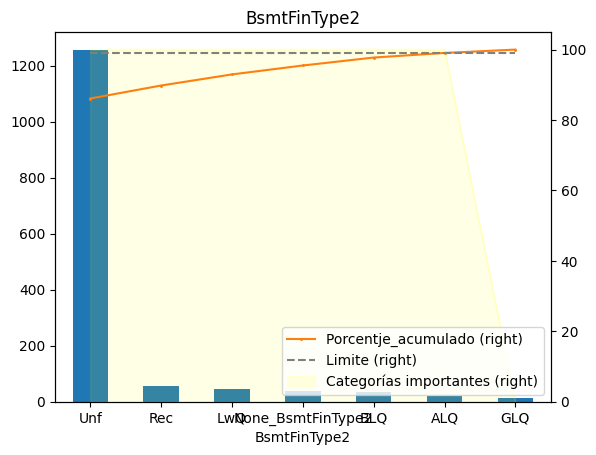

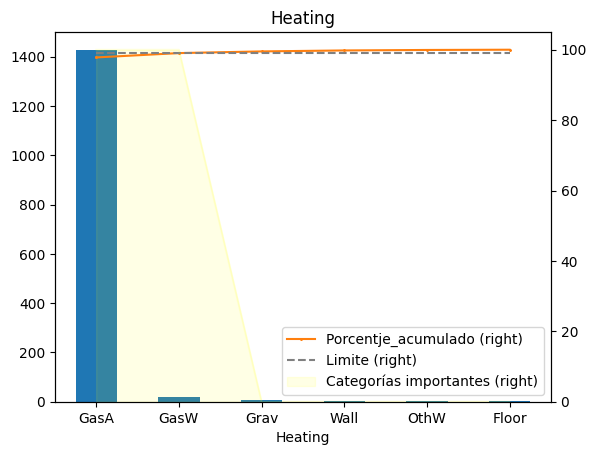

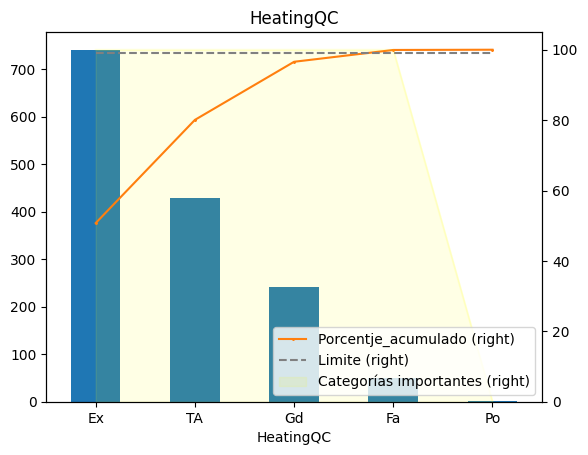

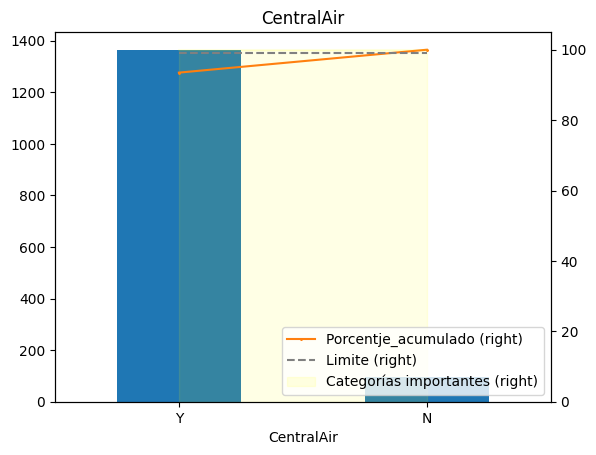

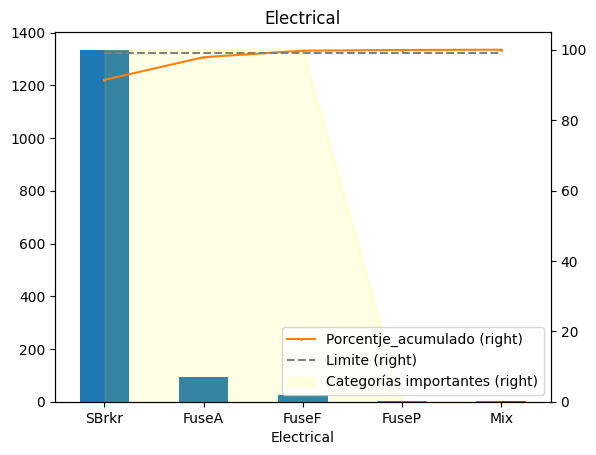

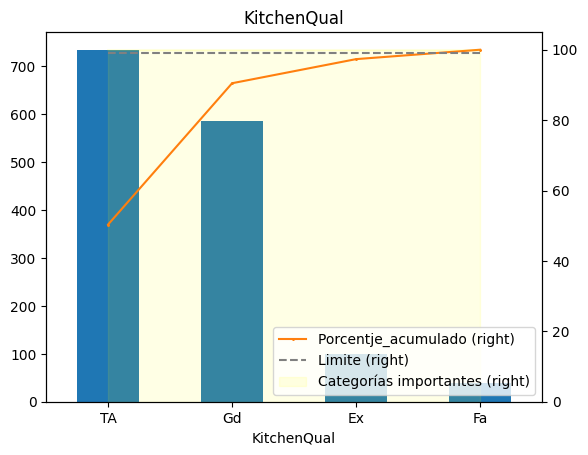

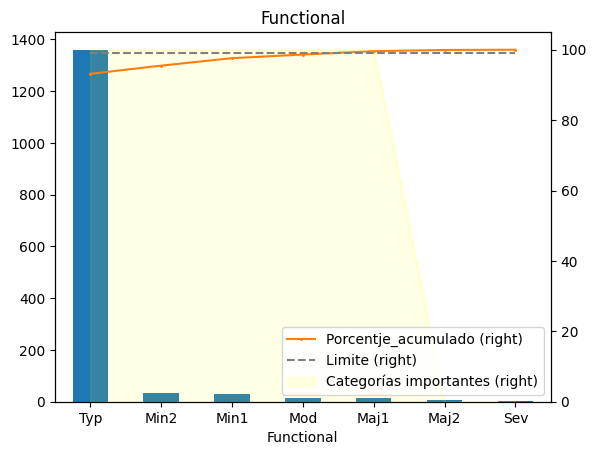

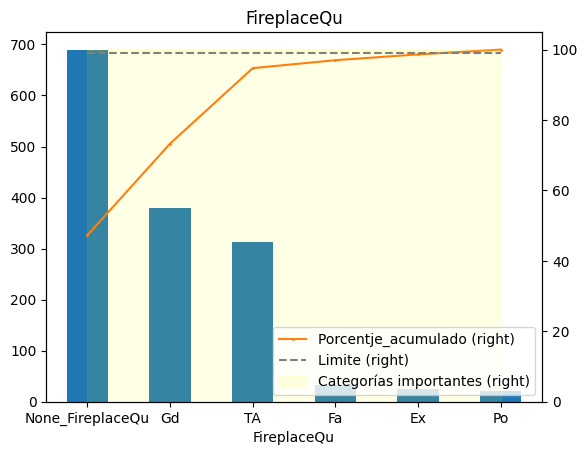

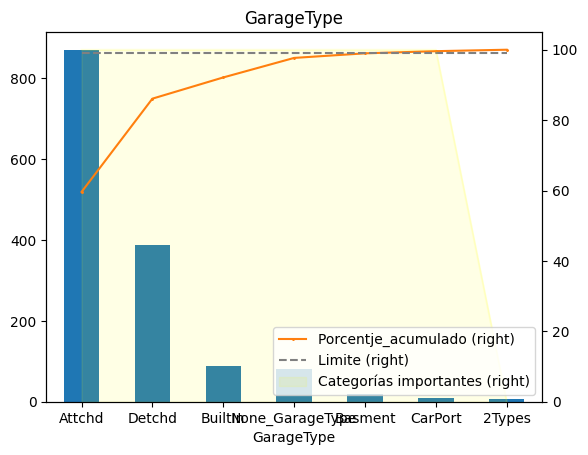

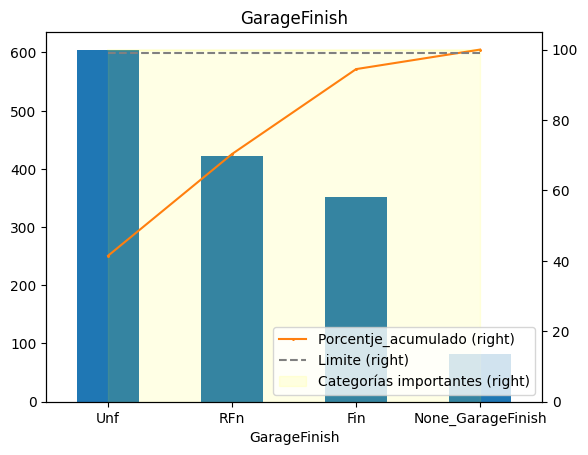

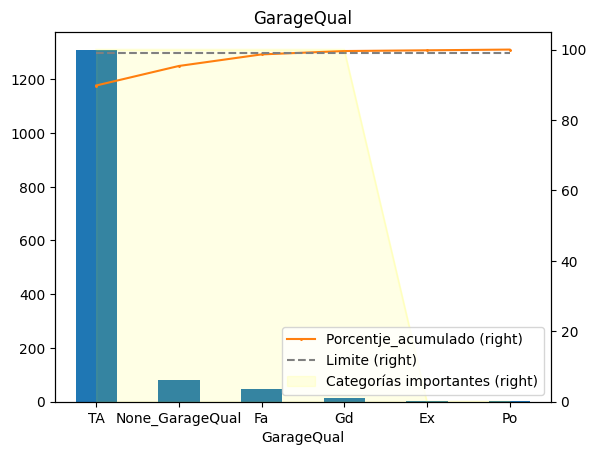

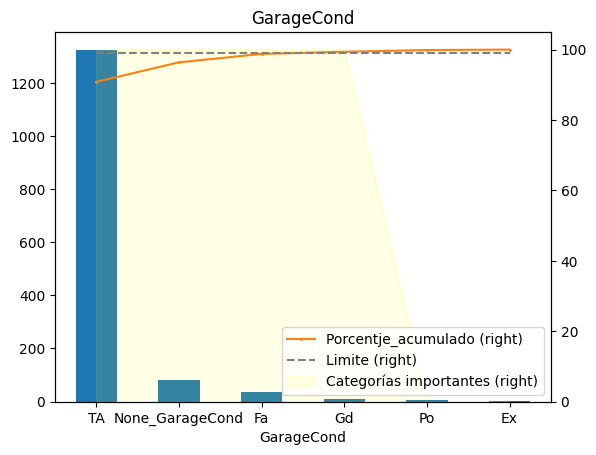

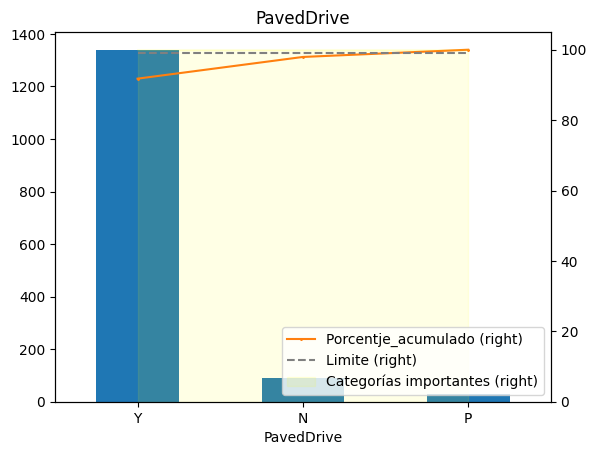

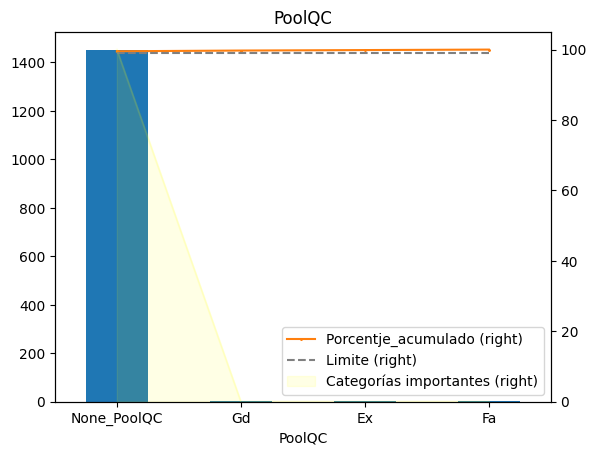

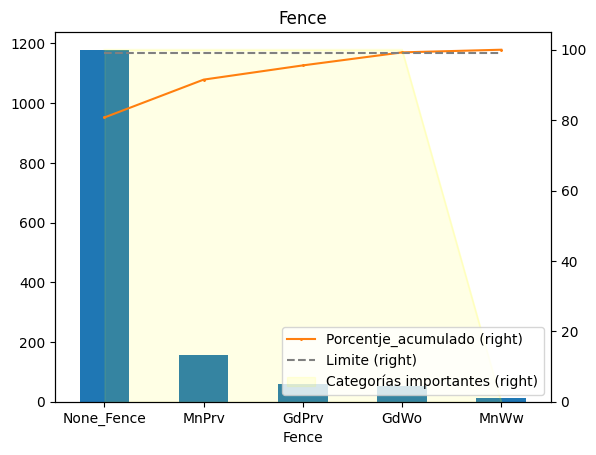

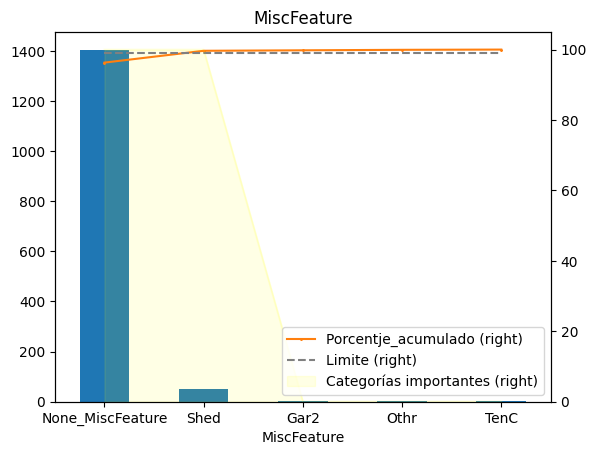

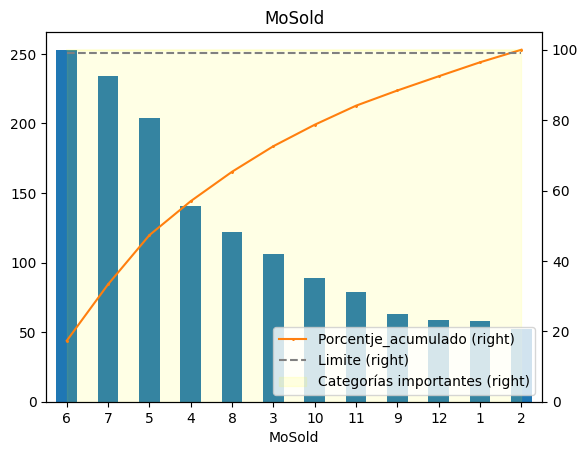

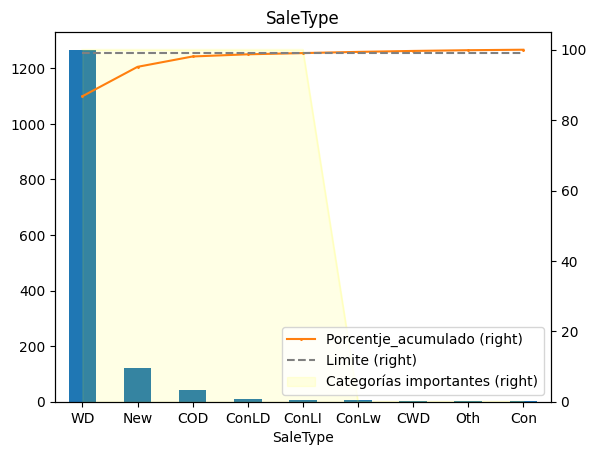

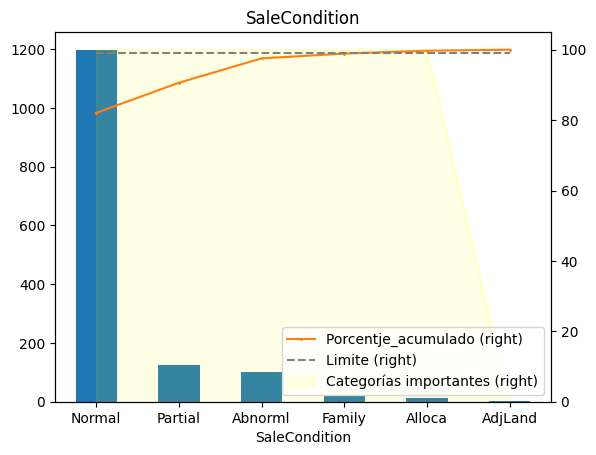

In [ ]:
### Creamos un loop para eliminar las categorias menos importantes de todas las columnas categoricas
for x in categoricas:
  df[x] = np.where(df[x].isin(categorias_utiles_pareto(df[x], 99)),df[x],np.nan)


In [ ]:
df[categoricas].nunique()

,0
MSSubClass,13
MSZoning,4
Street,1
Alley,3
LotShape,3
LandContour,4
Utilities,1
LotConfig,4
LandSlope,2
Neighborhood,23


In [ ]:
###al solo usar el 99% de la data podemos observar que hay data categoricas donde solo queda 1 sola caracteristica, por lo cual borramos esas columnas.
df = df.drop( ["Street","Utilities","PoolQC"], axis = 1)

In [ ]:
categoricas_new = list(df.select_dtypes(include='object').columns)
he = pd.get_dummies(df[categoricas_new])
print(he.shape)
he.head()

(1460, 222)


,MSSubClass_20,MSSubClass_30,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_COD,SaleType_ConLD,SaleType_ConLI,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
df = df.drop(columns=categoricas_new)
df = pd.concat([df, he], axis=1)
df.shape

(1460, 256)

In [ ]:
df = df[[c for c in df if c != 'SalePrice'] + ['SalePrice']]
print(df.shape)
df.info()

(1460, 256)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 256 entries, LotFrontage to SalePrice
dtypes: bool(222), float64(2), int64(32)
memory usage: 704.5 KB


In [ ]:
boleanas=[]
for col in df.columns:
  if df[col].nunique()==2:
    boleanas.append(col)
df[boleanas]=df[boleanas].astype('bool')

Variables no relevantes o redundantes

In [ ]:
numericas = list(df.select_dtypes(include=['int64', 'float64']).columns)
numericas

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold',
 'SalePrice']

In [ ]:
df[numericas].corr()['SalePrice']

,SalePrice
LotFrontage,0.329574
LotArea,0.263843
OverallQual,0.790982
OverallCond,-0.077856
YearBuilt,0.522897
YearRemodAdd,0.507101
MasVnrArea,0.472614
BsmtFinSF1,0.386420
BsmtFinSF2,-0.011378
BsmtUnfSF,0.214479


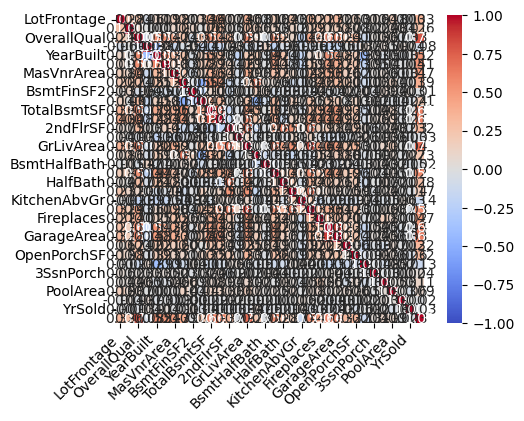

In [ ]:
corr_matrix = correlacion(df[numericas])

In [ ]:
celda_sobre_diagonal_ppal = np.triu(np.ones_like(corr_matrix), 1).astype(bool)
triangulo_sup = corr_matrix.where(celda_sobre_diagonal_ppal).abs()
redundantes = [column for column in triangulo_sup.columns
          if any(triangulo_sup[column] >= .75)]
redundantes

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea', 'SalePrice']

In [ ]:
### Eliminamos problemas de variables redundantes, el umbral que use fue del .75 de correlacion para poder decidir si una variables es redundante o no
df = df.drop(['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea'], axis = 1)

KeyError: "['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea'] not found in axis"

Regresiones

In [ ]:
y = df['SalePrice']
X = df.drop('SalePrice',
            axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    shuffle=True,
                                                    random_state=1998)

In [ ]:
### Comenzamos modelando una regresion lineal, dandonos un MAE de 20005

lr = LinearRegression().fit(X_train, y_train)

y_pred = lr.predict(X_test)

error_medio_absoluto = np.mean(np.absolute(y_test - y_pred ))
error_medio_absoluto

20055.840433812973

In [ ]:
errores = (y_test - y_pred)
len(errores)

365

In [ ]:
## Se observan que nuestras metricas tienen valores muy grandes
print(f'media: {np.mean(errores)}')
print(f'desviación estandar: {np.std(errores)}')
print(f'kurtosis: {kurtosis(errores)}')
print(f'skewness: {skew(errores)}')

media: 1763.1588209406502
desviación estandar: 34172.544123598156
kurtosis: 28.007971242754582
skewness: 3.5956140820015876


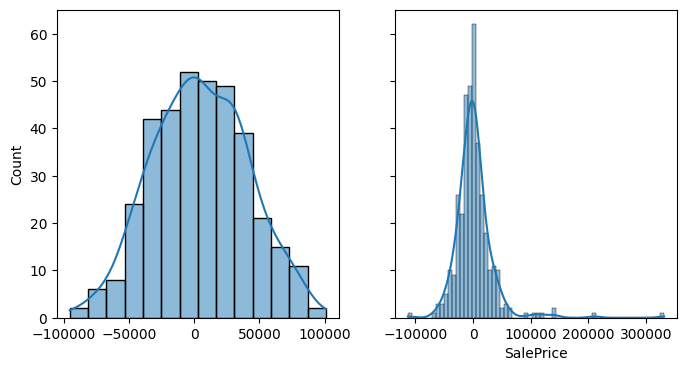

In [ ]:
#### Aqui vemos que nuestros errores tienen varios valores extremos por lo que podemos pensar que una regresion de Hubert podria funcionar mejor
n = len(y_test)
errores_teoricos = np.random.normal(np.mean(errores), np.std(errores), n)

fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey='all')
for dat, subplot in zip((errores_teoricos, errores), ax.flatten()):
    sns.histplot(x=dat, ax=subplot, kde=True )

plt.show()

In [ ]:
### Probamos la regresion de Hubert, a pesar de que salio un error de convergencia nuestro MAE parece ser mas bajo
hr = HuberRegressor(epsilon=1.35,   max_iter=1000000,  alpha=0,  warm_start=False,
                    fit_intercept=True, tol=1e-05)
hr = hr.fit(X_train, y_train)
y_pred_hr = hr.predict(X_test)

print(metrics.mean_absolute_error(y_test, y_pred_hr))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_hr))

17133.92599226718
MAE: 17133.92599226718


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
hr.coef_

array([ 8.21868710e+01,  5.63831427e-01,  9.60964597e+03,  6.44674233e+03,
        4.48563705e+02,  7.77862077e+01,  2.93820933e+01,  1.56453167e+01,
        6.51952976e+00, -2.00227118e+00,  2.01625753e+01, -2.16833019e-01,
       -3.41241177e+01,  5.45319193e+01,  1.63452305e+03, -1.12070802e+03,
       -1.91760013e+01, -1.20551394e+02, -4.29745235e+03, -2.91466322e+03,
        1.78943268e+03,  5.82075327e+03,  1.94475026e+01,  2.33027647e+01,
        1.77890346e+01,  3.19101727e+01,  3.21271280e+01, -1.20765980e+01,
       -2.89422185e+00, -5.36339927e+02,  1.41485517e+03,  1.46247484e+03,
        5.80185953e+02,  3.52200486e+02,  1.92960477e+03,  6.97993451e+02,
       -4.72258838e+02, -1.99667108e+02, -1.25427190e+02, -1.78386960e+03,
       -1.18708737e+03, -2.04605187e+03, -7.70891319e+02,  9.38021982e+02,
       -2.87658308e+02,  1.84942668e+03, -2.24697407e+03,  4.64258922e+02,
        4.78328767e+02, -9.44842228e+02,  1.00447946e+03,  8.20347953e+02,
       -1.39486140e+03, -

In [ ]:
### Estandarizamos los datos
X_estandarizados = X.copy()
columnas = X.columns

scaler = StandardScaler()

X_estandarizados[columnas] = scaler.fit_transform(X[columnas])

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_estandarizados, y, test_size=0.25,
                                                    shuffle=True, random_state=1998)

In [ ]:
#### Nuetsra regresio converge y nuestra MAE es mucho mejor
hr_st = HuberRegressor( epsilon=1.35,   max_iter=1000,  alpha=0,  warm_start=False,
                    fit_intercept=True, tol=1e-05)
hr_st = hr.fit(X_train, y_train)
y_pred_hr_st = hr.predict(X_test)

print(metrics.mean_absolute_error(y_test, y_pred_hr_st))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_hr_st))

16747.74190646584
MAE: 16747.74190646584


In [ ]:
## Aqui podemos medir la importancia de nuestras variables, por ejemplo vemos que la variable GrLivArea incrementa muchismo el precio, por otro lado una casa que tenga como SaleCondition = Partial probablemente tenga un precio mas barato
coeficientes_hr_st = pd.Series(hr_st.coef_, index= columnas)

coef_estand = pd.DataFrame(coeficientes_hr_st.sort_values())
coef_estand

,0
SaleCondition_Partial,-6751.256352
Neighborhood_NAmes,-6347.593482
Neighborhood_Edwards,-5979.478417
MSSubClass_160,-5479.301657
MSSubClass_20,-5386.515998
...,...
GarageType_Detchd,10975.181176
GarageType_Attchd,11684.481783
Foundation_CBlock,11700.598694
Foundation_PConc,12001.691315
